# Relationships between variables

# Contents
# 1. Merge dataframes
# 2. Create a correlation matrix heatmap (colored)
# 3. Create a scatterplot
# 4. Create a pair plot
# 5. Create a categorical plot
# 6. Answers to previous questions
# 7. Hypotheses based on knowledge to present

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.10.0'

In [5]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Define file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/6.1' 
# Get Electric Vehicle df
EV_df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared', 'EV_latest.pkl'))

In [9]:
EV_df.shape

(235688, 19)

In [11]:
EV_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract', 'ER', 'Longitude', 'Latitude'],
      dtype='object')

In [13]:
# Get income df
HI_df = pd.read_excel(os.path.join(path,'02 Data', 'Prepared', 'WA_HI_2010_to_2016.xlsm'))

In [15]:
HI_df.shape

(10206, 8)

In [17]:
HI_df.columns

Index(['Unnamed: 0', 'GEO_ID', 'County', 'State', 'Census_Tract', 'NAME',
       'Model Year', 'Median Income'],
      dtype='object')

In [19]:
HI_df.head()

,Unnamed: 0,GEO_ID,County,State,Census_Tract,NAME,Model Year,Median Income
0,1,1400000US53001950100,Adams County,Washington,Census Tract 9501,"Census Tract 9501, Adams County, Washington",2010,42039
1,2,1400000US53001950200,Adams County,Washington,Census Tract 9502,"Census Tract 9502, Adams County, Washington",2010,44828
2,3,1400000US53001950300,Adams County,Washington,Census Tract 9503,"Census Tract 9503, Adams County, Washington",2010,41686
3,4,1400000US53001950400,Adams County,Washington,Census Tract 9504,"Census Tract 9504, Adams County, Washington",2010,39013
4,5,1400000US53001950500,Adams County,Washington,Census Tract 9505,"Census Tract 9505, Adams County, Washington",2010,35529


In [21]:
EV_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,ER,Longitude,Latitude
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,57136.66474,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Long-range,-122.23825,47.49461
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,57136.66474,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10,Long-range,-122.64681,47.73689
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,57136.66474,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,Unknown,-122.54729,47.42602
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,57136.66474,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10,Mid-range,-122.81585,47.64509
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,57136.66474,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10,Mid-range,-122.68993,46.88897


In [23]:
# strip county name from HI_df county column # change State to WA
# join on County State and Model Year
# Remove ' County' from the 'County' column
HI_df['County'] = HI_df['County'].str.replace(' County', '', regex=False)

print(HI_df) # make columns consistent for merge

       Unnamed: 0                GEO_ID   County        State  \
0               1  1400000US53001950100    Adams   Washington   
1               2  1400000US53001950200    Adams   Washington   
2               3  1400000US53001950300    Adams   Washington   
3               4  1400000US53001950400    Adams   Washington   
4               5  1400000US53001950500    Adams   Washington   
...           ...                   ...      ...          ...   
10201        1454  1400000US53077940002   Yakima   Washington   
10202        1455  1400000US53077940003   Yakima   Washington   
10203        1456  1400000US53077940004   Yakima   Washington   
10204        1457  1400000US53077940005   Yakima   Washington   
10205        1458  1400000US53077940006   Yakima   Washington   

               Census_Tract                                             NAME  \
0         Census Tract 9501      Census Tract 9501, Adams County, Washington   
1         Census Tract 9502      Census Tract 9502, Adams C

In [25]:
# Replace 'Washington' with 'WA' in the 'State' column
HI_df['State'] = HI_df['State'].replace('Washington', 'WA')

In [29]:
# Strip whitespace and replace 'Washington' with 'WA' in the 'State' column
HI_df['State'] = HI_df['State'].str.strip().replace('Washington', 'WA')

In [31]:
HI_df.head()

,Unnamed: 0,GEO_ID,County,State,Census_Tract,NAME,Model Year,Median Income
0,1,1400000US53001950100,Adams,WA,Census Tract 9501,"Census Tract 9501, Adams County, Washington",2010,42039
1,2,1400000US53001950200,Adams,WA,Census Tract 9502,"Census Tract 9502, Adams County, Washington",2010,44828
2,3,1400000US53001950300,Adams,WA,Census Tract 9503,"Census Tract 9503, Adams County, Washington",2010,41686
3,4,1400000US53001950400,Adams,WA,Census Tract 9504,"Census Tract 9504, Adams County, Washington",2010,39013
4,5,1400000US53001950500,Adams,WA,Census Tract 9505,"Census Tract 9505, Adams County, Washington",2010,35529


In [57]:
HI_df.shape

(10206, 8)

In [33]:
EV_df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                    float64
ER                      

In [35]:
HI_df.dtypes

Unnamed: 0        int64
GEO_ID           object
County           object
State            object
Census_Tract     object
NAME             object
Model Year        int64
Median Income     int64
dtype: object

In [37]:
# make a subset of EV_df with just 2010 to 2016 model years # income data only for this period
sub = EV_df[(EV_df['Model Year'] >= 2010) & (EV_df['Model Year'] < 2017)]

In [39]:
sub.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,ER,Longitude,Latitude
5,5YJSA1DN0C,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.00000,186637195,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,Long-range,-122.92333,47.03779
10,1N4AZ0CP1E,King,Newcastle,WA,98059.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,57136.66474,130630342,POINT (-122.15734 47.48718),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Mid-range,-122.15734,47.48718
14,5YJSA1H29F,Thurston,Olympia,WA,98506.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,57136.66474,241126567,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10,Long-range,-122.87741,47.05997
16,1N4AZ0CP2G,Kitsap,Olalla,WA,98359.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,57136.66474,225541921,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,Mid-range,-122.54729,47.42602
17,1N4AZ0CP5F,King,Issaquah,WA,98029.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,57136.66474,112393263,POINT (-122.00292 47.54748),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Mid-range,-122.00292,47.54748


In [55]:
sub.shape

(19796, 19)

In [45]:
# Strip leading and trailing spaces from string columns in both DataFrames
HI_df['County'] = HI_df['County'].str.strip()
HI_df['State'] = HI_df['State'].str.strip()

In [47]:
sub['County'] = sub['County'].str.strip()
sub['State'] = sub['State'].str.strip()

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_88383/2067114479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['County'] = sub['County'].str.strip()
/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_88383/2067114479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['State'] = sub['State'].str.strip()


In [65]:
# Aggregate HI_df by County, State, and Model Year
HI_df_agg = HI_df.groupby(['County', 'State', 'Model Year'], as_index=False).agg({
    'Median Income': 'mean'})  # to get only one median income value and not duplicate rows

In [67]:
HI_df_agg.shape

(273, 4)

In [69]:
# Now perform the merge
merged_df = HI_df_agg.merge(sub, on=['County', 'State', 'Model Year'], indicator=True)

In [71]:
merged_df.shape

(19748, 21)

In [73]:
merged_df.head()

,County,State,Model Year,Median Income,VIN (1-10),City,Postal Code,Make,Model,Electric Vehicle Type,...,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,ER,Longitude,Latitude,_merge
0,Adams,WA,2011,40697.8,JN1AZ0CPXB,Othello,99344.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),...,73.0,57136.66474,118833235,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Mid-range,-119.17420,46.82616,both
1,Adams,WA,2012,40922.4,JN1AZ0CP6C,Othello,99344.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),...,73.0,57136.66474,159968420,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Mid-range,-119.17420,46.82616,both
2,Adams,WA,2013,44315.0,3FA6P0SUXD,Othello,99344.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),...,19.0,57136.66474,177219857,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Low-range,-119.17420,46.82616,both
3,Adams,WA,2014,45199.2,1FADP5CUXE,Ritzville,99169.0,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),...,19.0,57136.66474,195909430,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Low-range,-118.37977,47.12740,both
4,Adams,WA,2014,45199.2,WBY1Z2C58E,Othello,99344.0,BMW,I3,Battery Electric Vehicle (BEV),...,81.0,57136.66474,265934854,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Mid-range,-119.17420,46.82616,both


In [77]:
# export HI_EV merged_df for future analysis
merged_df.to_pickle(os.path.join(path, '02 Data','Prepared', 'EV_HI_2010_to_2016.pkl'))

In [13]:
# Rename columns whose names are too long

EV_df.rename(columns = {'Electric Vehicle Type' : 'EV_Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Elig'},
                      inplace = True)

In [15]:
EV_df.dtypes

VIN (1-10)            object
County                object
City                  object
State                 object
Postal Code          float64
Model Year             int64
Make                  object
Model                 object
EV_Type               object
CAFV_Elig             object
Electric Range       float64
Base MSRP            float64
DOL Vehicle ID         int64
Vehicle Location      object
Electric Utility      object
2020 Census Tract    float64
ER                    object
Longitude            float64
Latitude             float64
dtype: object

In [17]:
EV_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,EV_Type,CAFV_Elig,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,ER,Longitude,Latitude
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,57136.66474,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Long-range,-122.23825,47.49461
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,57136.66474,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10,Long-range,-122.64681,47.73689
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,57136.66474,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,Unknown,-122.54729,47.42602
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,57136.66474,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10,Mid-range,-122.81585,47.64509
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,57136.66474,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10,Mid-range,-122.68993,46.88897


In [27]:
EV_df['City'].value_counts(dropna=False) #cities with the most EVS = Seattle, Bellevue, Vancouver, Redmond, Bothell
# by population top 5: Seattle	755,078, Spokane 229,447, Tacoma 222,906, Vancouver	196,442, Bellevue 151,574 #16th Redmond 80,280, 27th Bothell 50,213

City
Seattle        37410
Bellevue       11509
Vancouver       8510
Redmond         8211
Bothell         7739
               ...  
Lacrosse           1
Midway City        1
Glenwood           1
Phoenix            1
Morrisville        1
Name: count, Length: 788, dtype: int64

In [49]:
# crosstabs makes by model year
EV_df.groupby('Make').agg({'Model Year': ['median']})

,Model Year
,median
Make,
ACURA,2024.0
ALFA ROMEO,2024.0
AUDI,2022.0
AZURE DYNAMICS,2011.0
BENTLEY,2022.5
BMW,2023.0
BRIGHTDROP,2023.0
CADILLAC,2024.0


In [51]:
result = EV_df.groupby('Model Year')['Make'].value_counts().unstack(fill_value=0)

In [53]:
result

Make,ACURA,ALFA ROMEO,AUDI,AZURE DYNAMICS,BENTLEY,BMW,BRIGHTDROP,CADILLAC,CHEVROLET,CHRYSLER,...,ROLLS-ROYCE,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VINFAST,VOLKSWAGEN,VOLVO,WHEEGO ELECTRIC CARS
Model Year,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,21,0,0,0,0,0,2
2011,0,0,0,4,0,0,0,0,69,0,...,0,0,0,7,5,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,433,0,...,0,0,0,126,0,376,0,0,0,0
2013,0,0,0,0,0,0,0,0,756,0,...,0,26,0,708,0,295,0,0,0,0
2014,0,0,0,0,0,425,0,56,705,0,...,0,63,0,610,0,221,0,0,0,0


In [59]:
result.to_csv('result.csv', index=True)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [61]:
result = EV_df.groupby('Model Year')['County'].value_counts().unstack(fill_value=0)

In [63]:
result

County,Adams,Alameda,Albemarle,Alexandria,Allegheny,Allen,Anchorage,Anne Arundel,Arapahoe,Arlington,...,Washoe,Washtenaw,Whatcom,Whitman,Williamsburg,Williamson,Wise,Yakima,York,Yuba
Model Year,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,1,0,0,0,0,0,0,0,0,0,...,0,0,32,2,0,0,0,7,0,0
2012,1,0,0,0,0,0,0,0,0,0,...,0,0,60,6,0,0,0,23,0,0
2013,1,0,0,0,0,0,0,0,0,0,...,0,0,208,8,1,0,0,28,0,0
2014,2,0,1,0,0,0,0,0,0,0,...,0,0,124,12,0,0,0,36,0,0


In [65]:
result.to_csv('result.csv', index=True)

In [55]:
EV_df['Make'].value_counts(dropna=False)

Make
TESLA                     101078
CHEVROLET                  17135
NISSAN                     15532
FORD                       12605
KIA                        11345
BMW                         9646
TOYOTA                      9478
HYUNDAI                     7406
RIVIAN                      6750
VOLKSWAGEN                  5976
JEEP                        5955
VOLVO                       5862
AUDI                        4360
CHRYSLER                    3786
MERCEDES-BENZ               2381
HONDA                       2134
SUBARU                      2012
PORSCHE                     1473
POLESTAR                    1260
CADILLAC                    1149
MINI                        1122
MITSUBISHI                  1114
MAZDA                       1020
LEXUS                        959
DODGE                        780
FIAT                         773
LUCID                        395
LINCOLN                      361
GMC                          360
GENESIS                      344
SMART

In [57]:
# TESLA Model Y, TESLA Model 3, NISSAN Leaf, TESLA Model S, Chevrolet Bolt EV
EV_df['Model'].value_counts(dropna=False)

Model
MODEL Y           49253
MODEL 3           36064
LEAF              13814
MODEL S            7885
BOLT EV            7278
                  ...  
MIRAI                 2
SQ6                   2
VF 8                  2
SL-CLASS              1
BRIGHTDROP 400        1
Name: count, Length: 170, dtype: int64

In [31]:
EV_df['County'].value_counts(dropna=False) 
#counties with the most EVS: King (Seattle), Snohomish (North of Seattle), Pierce (South of Seattle, Mt Rainer Tacoma), Clark (Southernmost county: Vancouver), Thurston (Lacey, Olympia)

County
King             118710
Snohomish         28814
Pierce            19256
Clark             14101
Thurston           8595
                  ...  
Doña Ana              1
Norfolk               1
Isle of Wight         1
Jackson               1
Tooele                1
Name: count, Length: 212, dtype: int64

In [33]:
# most popular electric utilities Puget Sound Energy (Tacoma,?), City of Seattle (Tacoma), Bonneville Power Administration (Clark County, Tacoma), 
EV_df['Electric Utility'].value_counts(dropna=False) 

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               85297
PUGET SOUND ENERGY INC                                                                      48923
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                40106
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                            13761
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY             10685
                                                                                            ...  
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF JEFFERSON COUNTY                                   2
CITY OF SEATTLE - (WA)                                                                          2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY                                      1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                                        1
BON

In [7]:
#export df as csv
HI_df.to_csv(os.path.join(path, '02 Data','Prepared', 'WA_HI_2010_to_2016.csv'))

# 2. Create a correlation matrix heatmap (colored)

In [79]:
#look for linear dependence between electric range and income
# set aside non-numeric object columns
Plot_EV_df = merged_df[['Electric Range','Median Income']]

In [81]:
# Create a correlation matrix using pandas

Plot_EV_df.corr()

,Electric Range,Median Income
Electric Range,1.000000,0.110942
Median Income,0.110942,1.000000


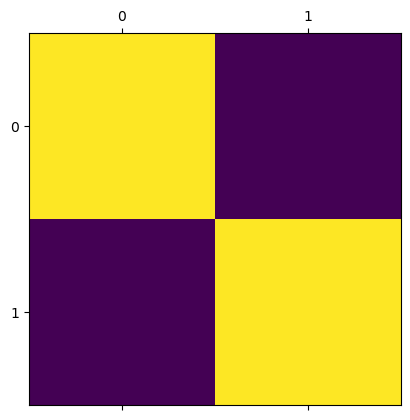

In [83]:
# Create a correlation heatmap using matplotlib

plt.matshow(Plot_EV_df.corr())
plt.show()

In [85]:
# save the image in the working directory. 
# Save figure
plt.matshow(Plot_EV_df.corr())
plt.savefig("HI_ER.png") 

In [87]:
#current dir
cwd = os.getcwd()
cwd

'/Users/alison/Documents/Data Analysis - Tasks/6.1/03 Scripts'

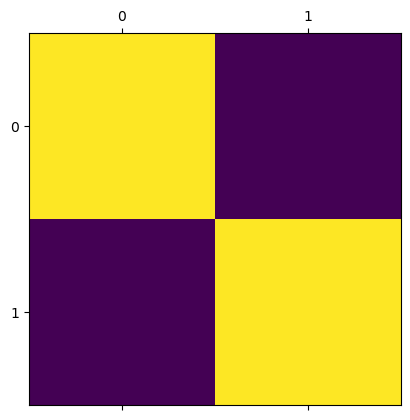

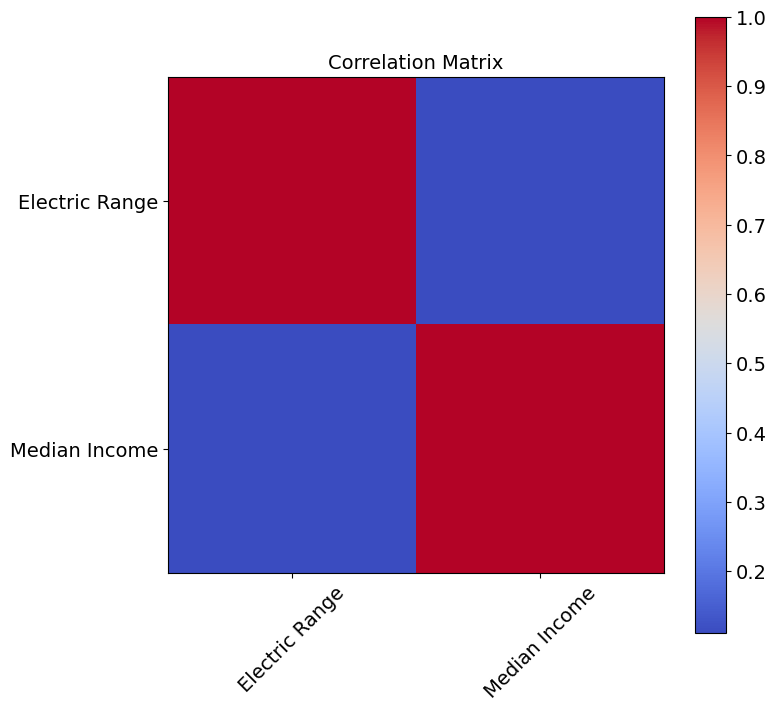

In [89]:
# Add labels, a legend, and change the size of the heatmap


EV_co_numeric_df = Plot_EV_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = EV_co_numeric_df.corr()

plt.figure(figsize=(8, 8))  # Create a figure with size
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest') #matshow was causing an error so I used imshow
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=14, rotation=45)  # x axis labels
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=14)  # y axis labels
cb = plt.colorbar()  # add a color legend (called colorbar)
cb.ax.tick_params(labelsize=14)  # add font size
plt.title('Correlation Matrix', fontsize=14)  # add title
plt.show()  # show the plot

In [91]:
# save the image in the working directory. 
# Save figure
plt.imshow(EV_co_numeric_df.corr())
plt.savefig("ER HI correlation matrix.png")

In [93]:
# There is a weak relationship between the two numeric variables (Electric Range, median Income) in the dataset, 0.2. 
# Try same with seaborn. 
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(Plot_EV_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

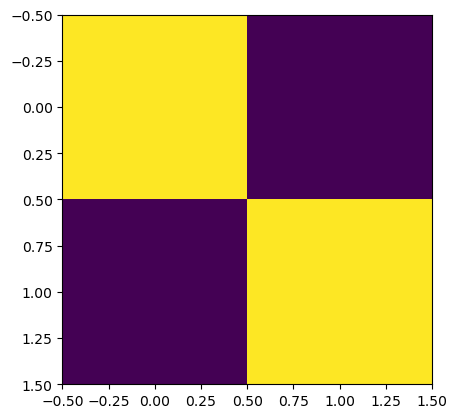

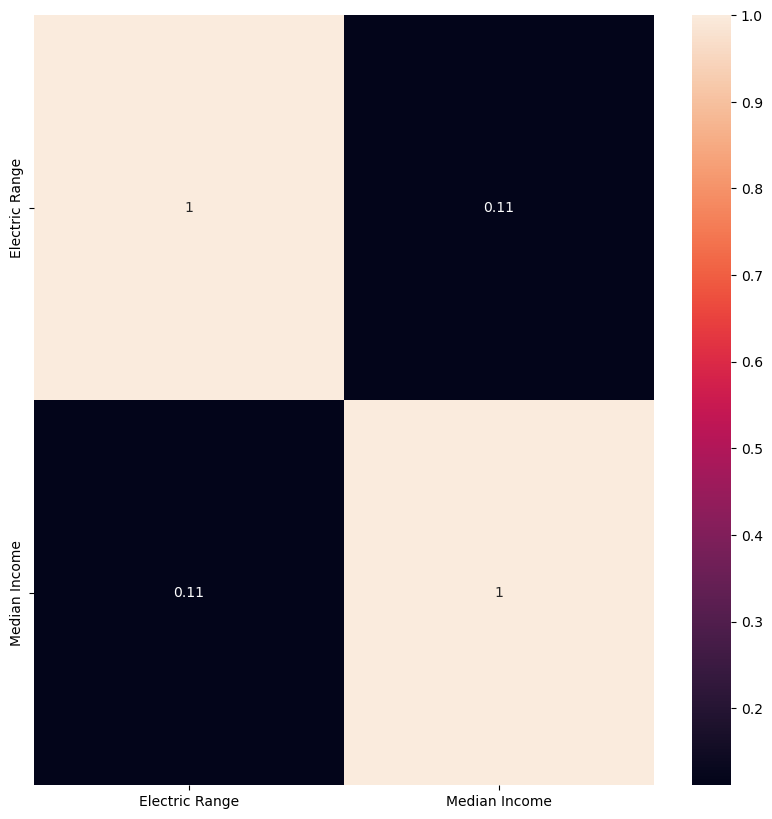

In [95]:
plt.show()

# 3. Create a scatterplot

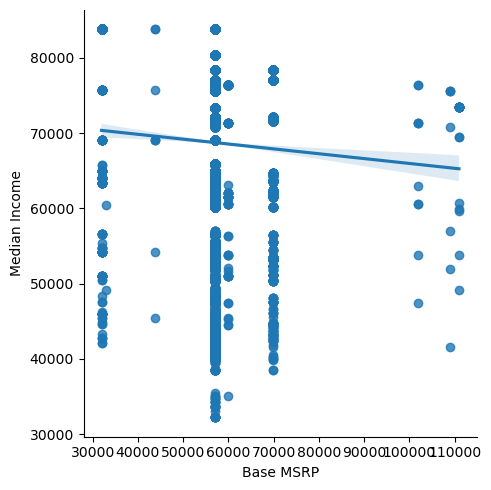

In [11]:
# Create a scatterplot for the "Base MSRP" and "Median Income" columns in seaborn
g2 = sns.lmplot(x = 'Base MSRP', y = 'Median Income', data = merged_df)
plt.show()

In [99]:
# Save figure
g2.savefig('lmplot_base_msrp_vs_median_income.png')

In [101]:
# All the zero values are not helping. 
# The outlier base MSRP value of 843,000 is obvious here. 
# Also revealing a weak correlation between electric range and Base MSRP. 
# I don't have any stronger relationships to correlate.
###
# Create a pair plot of the entire data set.
# Keep only the variables you want to use in the pair plot

sub2 = merged_df[['Postal Code', 'Model Year', 'Median Income','Base MSRP',]]

# 4. Create a pair plot

In [103]:
# Create a pair plot 

g = sns.pairplot(sub2)
g.savefig('HI_pair.png')

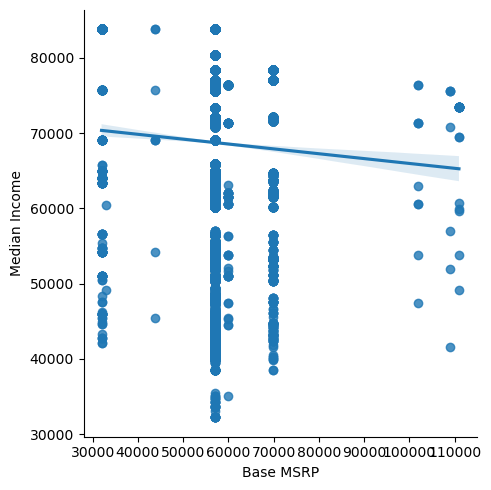

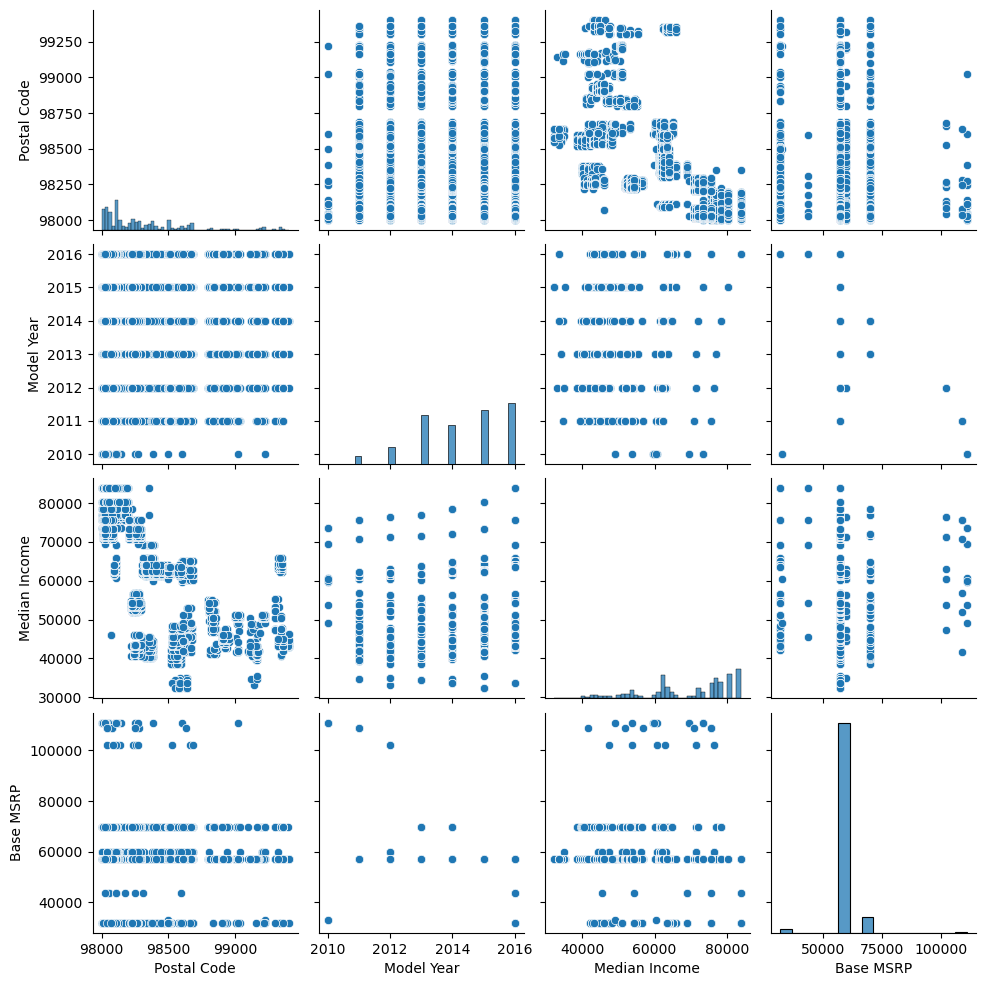

In [105]:
plt.show()

In [107]:
# There are some interesting observations here. 
# If income is higher more likely to have a new model EV?
# Median Income not a predictor of car price (note the imputed mean frequency will impact)
# Are you more likely to have an EV if your income is moderate? create flags to investigate further
# EVs do appeal to all income groups. Interesting cluster of postcode high income, but also postcode low income.
# Did EVs get more expensive between 2011-2015. Was this peak EV?
###
# Create a categorical plot and interpret the results.
# Use a histogram to visualize the distribution of the variables. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(merged_df['Median Income'], bins = 20, kde = True)

<Axes: xlabel='Median Income', ylabel='Count'>

# 5. Create a categorical plot

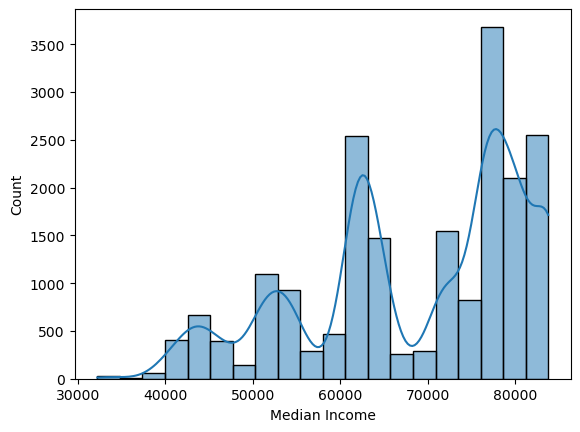

In [109]:
plt.show()

In [111]:
# create income flag
merged_df.loc[merged_df['Median Income'] < 45000, 'Income'] = 'Low'

In [ ]:
merged_df.loc[(merged_df['Median Income'] >= 45000) & (merged_df['Median Income'] < 60000), 'Income'] = 'Low Middle'

In [113]:
merged_df.loc[(merged_df['Median Income'] >= 60000) & (merged_df['Median Income'] < 75000), 'Income'] = 'High Middle' #low middle and high middle?

In [115]:
merged_df.loc[merged_df['Median Income'] >= 75000, 'Income'] = 'High'

In [117]:
merged_df['Income'].value_counts(dropna = False)

Income
Middle    10507
High       9146
Low          95
Name: count, dtype: int64

In [15]:
# Create a categorical plot in seaborn using the Income categories created above

sns.set(style="ticks")
g = sns.catplot(x='Base MSRP', y='Median Income', hue='Median Income', data=merged_df)
g.set_xticklabels(rotation=45) #rotate year labels for legibility

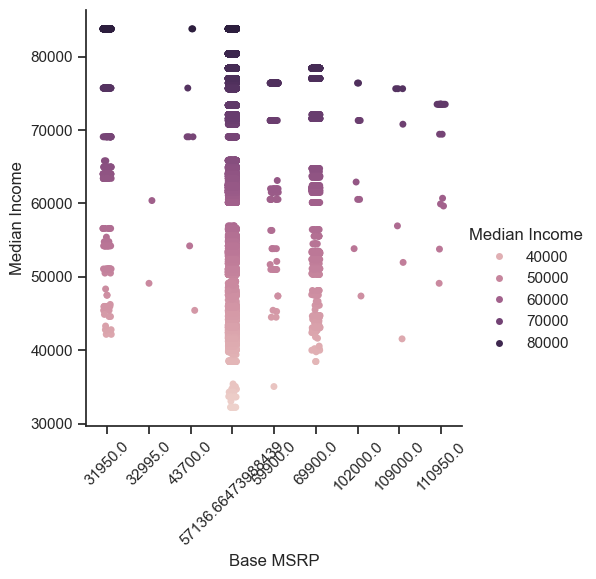

In [17]:
plt.show()

In [119]:
# Create a categorical plot in seaborn using the Income categories created above

sns.set(style="ticks")
g = sns.catplot(x='Model Year', y='Median Income', hue='Income', data=merged_df)
g.set_xticklabels(rotation=45) #rotate year labels for legibility

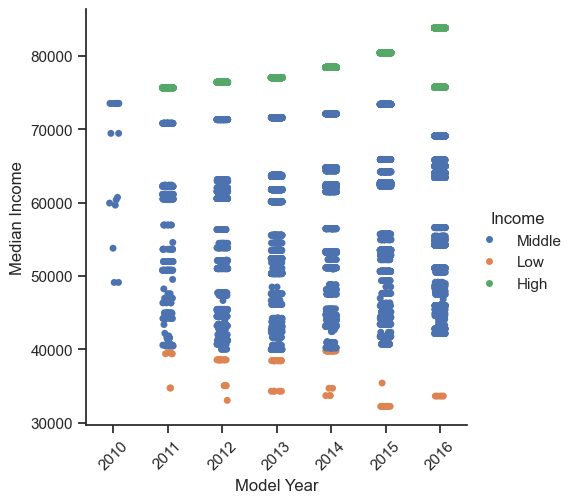

In [121]:
plt.show()

In [123]:
# fig = g.get_figure()
g.savefig("income_cat.png") 

# 6. Answers to previous questions

In [ ]:
# Following are questions that have been answered or partially answered from this analysis.
# Low income slightly more likely to have EV than High income. Middle income most likely to have EV. 
# High income more likely to have new model. 
# Interested to explore more with clusters.
# Data limitations as assuming model year and income year match, when we don't have purchase date data. 
##
# Have the number of EVs in Washington increased over time? There are definitely more newer models than older ones. # But we don't know about any deregistered vehicles.
# What is the age range of the EVs? Model years range from 2000 to 2025.
# Where are the oldest EVs located? Where are the newest? There are few 2000 models registered all in a similar location, but maybe there were more that are no longer registered.
# Has the average MSRP changed over time? There has been a 'reasonable' price across the model years but from 2015-2020 there were a higher number of more expensive models registered.
# Have there been improvements to Electric Range overtime? Yes, but there are many unnowns in the dataset. Some of the longest ER values are from 2020 models.

# 7. Hypotheses based on knowledge to now

In [ ]:
# The 2000 model EVs are in the same or neighbouring postcodes. 
# Plug-in hybrids have a lower ER than BEVs. 
# Sales of EVs peaked in 2020 and have been on the decline since. (Test the moment is over sentiment).
# There are more EVs in urban areas than suburban or rural areas.
# There are more EVs in affluent suburbs (higher income).